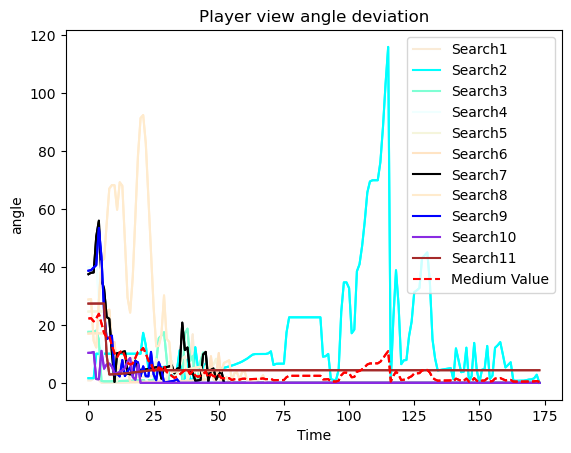

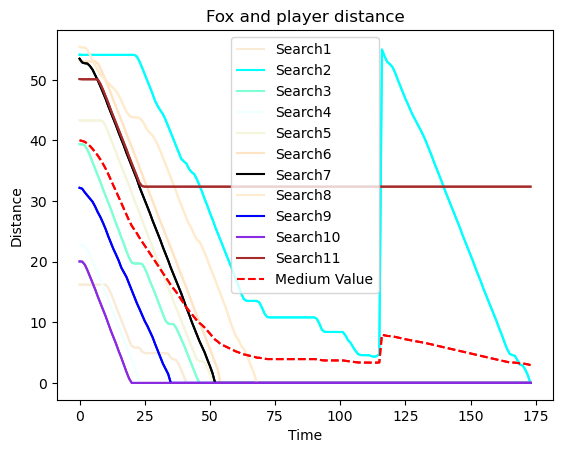

In [5]:
# This is a sample Python script.

# Press ⌃R to execute it or replace it with your code.
# Press Double ⇧ to search everywhere for classes, files, tool windows, actions, and settings.
import numpy as np
import matplotlib.pyplot as plt

# curve color
colorType = ['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond',
             'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral',
             'cornflowerblue']
typeDistance = 2
typeAngle = 1


# function for open a txt file and store data in list
def openFile(file_name):
    data = []
    file = open(file_name, 'r')
    file_data = file.readlines()
    for row in file_data:
        tmp_list = row.split(',')
        data.append(tmp_list)
        return data


# convert string data into float
def convertFloat(arr):
    newArr = []
    for n in arr:
        newArr.append(float(n))
    return newArr


# generate data (have 10 row)
def dataProcess(fileName):
    DataToPrint = openFile(fileName)
    DataTemp = DataToPrint[0]
    DataTemp.pop()
    DataToPrint = convertFloat(DataTemp)
    newDataList = [[0] * 500 for _ in range(11)]
    Time = 0
    Counter = 0
    for p in DataToPrint:
        if p != -1:
            newDataList[Time][Counter] = p
            Counter = Counter + 1
        else:
            Time = Time + 1
            Counter = 0
    return newDataList


# get a list of length (length of every column of data)
def getPreciseData(DataSet):
    space = []
    counter = 0
    row = 0
    for q in DataSet:
        space.append(counter)
        counter = 0
        row = row + 1
        for data in q:
            counter = counter + 1
            if data == 0:
                break
    return space


# this function is for converting the corresponding data into format size
# (for angle and distance data)
def generateDataList(DataSet, space):
    newDataset = []
    counter = 0
    for i in DataSet:
        newDataset.append(i)
        counter = counter + 1
        if counter == space:
            break
    return newDataset


def getColumn(dataList):
    counter = 0
    for q in dataList:
        for data in q:
            if data == -1:
                counter = counter + 1

    return counter


def getLongest(yLength):
    target = 0
    for item in yLength:
        if item >= target:
            target = item
    return target


def getLongestPosition(yLength, target):
    counter = 0
    for item in yLength:
        if target == item:
            return counter
        else:
            counter = counter + 1

def getMediumValue(dataList):
    yLength = getPreciseData(dataList)
    sizeList = np.arange(getLongest(yLength))
    itemList = np.arange(11)
    counter = 0
    total = 0
    mediumValue = []
    for item in sizeList:
        for target in itemList:
            temp = dataList[target]
            if temp[item] != 0:
                total = temp[item] + total
                counter = counter + 1
        mediumValue.append((total / 11))
        total = 0
        counter = 0
    return mediumValue

def imagePrint(dataList, imageType):
    yLength = getPreciseData(dataList)
    target = 1
    x = np.arange(getLongest(yLength))
    y = getLongestPosition(yLength, getLongest(yLength))
    for item in dataList:
        # the first item is 0 so start from the second item.
        np.arange(30,500)
        plt.plot(x, generateDataList(item, yLength[y]), colorType[target], label="Search" + str(target))
        plt.plot(x, generateDataList(item, yLength[y]), colorType[target])
        target = target + 1

    plt.plot(x, getMediumValue(dataList), '--r', label="Medium Value")
    plt.plot(x, getMediumValue(dataList), '--r')
    if imageType == typeDistance:
        plt.title('Fox and player distance')
        plt.xlabel('Time')
        plt.ylabel('Distance')
        plt.savefig('./Distance.jpg')
    else:
        plt.title('Player view angle deviation')
        plt.xlabel('Time')
        plt.ylabel('angle')
        plt.savefig('./Angle.jpg')

    plt.legend()
    plt.show()


if __name__ == '__main__':
    fileName1 = "Angle.txt"
    fileName2 = "save.txt"
    imagePrint(dataProcess(fileName1), typeAngle)
    imagePrint(dataProcess(fileName2), typeDistance)
